----
# Skill Homework #6 - Fitting Data to a Model
----

**Run this code in the cell below to get started.**
```
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#
# Now make some data
np.random.seed(20150108) # seed the random number generator so eveyone has the same data
time = np.linspace(0, 2, 101)
volts = 2.5 * np.sin(2 * np.pi * time - 1.0) + np.random.normal(0,0.1,len(time))
```

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
#
# Now make some data
np.random.seed(20150108) # seed the random number generator so eveyone has the same data
time = np.linspace(0, 2, 101)
volts = 2.5 * np.sin(2 * np.pi * time - 1.0) + np.random.normal(0,0.1,len(time))

# Introduction
A very important data analysis skill is fitting a model to your data. Let's set up the situation with the data we simulated above. You have measured the output voltage from a system and it is delayed by some amount from your input signal which has the form $V(t) = 1.0 \sin(2 \pi t)$. You want to know the amplitude of the output and the time delay.

You almost **always** want to start your data analysis by plotting your data, so that is what you should do first in the cell below. plot the data as dots, and your input as a red line. Your plot should look like the figure below.

![First Plot](Skill-06a.png)

** Plot the data in array `volts` and create the array for `input`.  **

Text(0, 0.5, 'Output (V)')

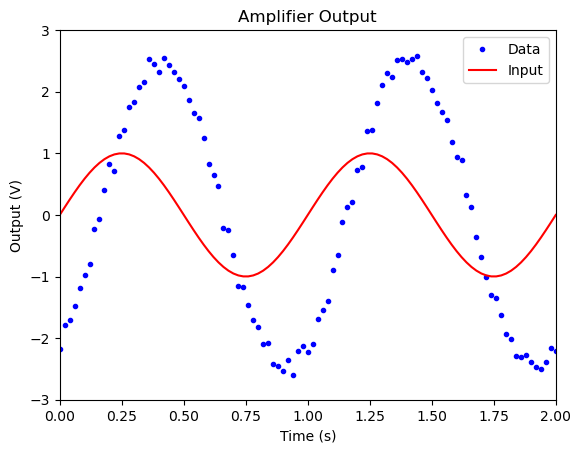

In [2]:
input = np.sin(2 * np.pi * time)
fig = plt.figure()
ax = fig.add_subplot(111)
pl1 = ax.plot(time, volts, '.b', label="Data")
pl2 = ax.plot(time, input, 'r', label="Input")
ax.set_xlim(0,2)
ax.set_ylim(-3,3)
ax.legend()
ax.set_title("Amplifier Output")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Output (V)")

# The Module `curve_fit`
The module we are going to use to fit data to a model is called `curve_fit`. We are going to treat it as a black box, but what it does is minimize the average vertical distance between each data point and the closest vertical point on the model function. This module is in the `optimize` module which in turn is in the module `scipy`. 

There are several steps to using `curve_fit`.

## 1. Write Your model Function
In our case, we know the time dependence of the output goes as $\sin(2\pi t)$. What we don't know (so what we have to fit for) is the amplitude and the starting time. Let's call the amplitude `amp` and the start time `t0`, so the model function we are fitting is $V_{out} = amp \sin(2 \pi (t - t_0))$. The module `curve_fit` needs a function with independent variable as the first parameter. The next parameters, howevermany there are, are parameters to your fitting function.

Here is a skeleton of the function. In the cell below you have to modify the function to work and return an array of the model function value for each x-value.
```
def vModel(time, amp, t0):
    return # put your return function in here
```

** Modify the function below to return the function above. **

In [3]:
def vModel(time, amp, t0):
    return amp * np.sin(2.0 * np.pi * (time - t0))

## 2. Guess Initial Values for Parameters
Well, our first plot above shows a reasonable starting place, but we can refine our initial guess for the amplitude by setting it to
$$amp_{start} = \frac{max(data) - min(data)}{2} $$
You can find the *max* and *min* using the `numpy` functions `np.max()` and `np.min()`.

For our initial `t0`, just try `0.0`.

Use the code below to set initial guesses.

In [4]:
ampStart = (np.max(volts)-np.min(volts))/2
t0Start = 0.0

## 3. Run the Data Fit
This is easy. Just run the code
```
paramsFit, paramsCovariance = \
  curve_fit(vModel, time, volts, p0=[ampStart, t0Start])
```
The function `curve_fit` does the very complicated non-linear least squares fit and returns two arrays: the best fit values of the parameters, and the *covarience* (think uncertainty) of those values. You capture those values in the variables `paramsFit`, and `paramsCovariance`. You should print out both of those variables.

Note the backslash continues the code to the next line.

In [5]:
paramsFit, paramsCovariance = \
  curve_fit(vModel, time, volts, p0=[ampStart, t0Start])

## 4. Interpret the Results
The array `paramsFit` are the best fit values of the parameters. I like to create new variables with these these values for use later. The line 
```
(ampFit, t0Fit) = paramsFit
```
creates two new variables in one compact line of code.

A second very important result is the **uncertainty** in your fit parameters. These are returned in the attribute `paramsCovariance`. This is more complicated since one variable can affect the other, the statistics are returned as a matrix. To simply look at the uncertainty of each variable by itself, you only need the diagonal elements and take their square roots.
You can calculate the uncertainties by the code
```
ampSD = np.sqrt(paramsCovariance[0,0])
t0SD = np.sqrt(paramsCovariance[1,1])
```
I like to clearly print these out for the use. I will capture the output in a string and print the string because I am going to use the string later in a plot. Copy and paste this code:
```
resultStr = \
r"""The amp is %.3f $\pm$ %.3f
The t0 is %.3f $\pm$ %.3f""" % (ampFit, ampSD, t0Fit, t0SD)
print(resultStr)
```

** Cut and paste the above code lines into the cell below and run the cell. **

In [6]:
(ampFit, t0Fit) = paramsFit
ampSD = np.sqrt(paramsCovariance[0,0])
t0SD = np.sqrt(paramsCovariance[1,1])
resultStr = \
r"""The amp is %.3f $\pm$ %.3f
The t0 is %.3f $\pm$ %.3f""" % (ampFit, ampSD, t0Fit, t0SD)
print(resultStr)

The amp is 2.494 $\pm$ 0.015
The t0 is 0.160 $\pm$ 0.001


## 5. Plotting Your Results
**Always plot your results!**

By now you should be able to plot the data and the model on the same figure. Here are some hints:
* The best fit values are in the variables `ampFit` and `t0Fit`, so you can use that to calculate your model line. I used the call
```
vModel(time, ampFit, t0Fit)
```
right in my call to `ax.plot`, like
```
ax1.plot(time,vModel(time, ampFit, t0Fit),'-g', label="Fit")
```

* I also used the method `ax.text` to write the best values right on my plot. The actual call is 
```
ax.text(0.1,2.8,resultStr)
```

This is how my final plot looked:
![First Plot](Skill-06b.png)

Make your final plot in the cell below.

Text(0, 0.5, 'Output (V)')

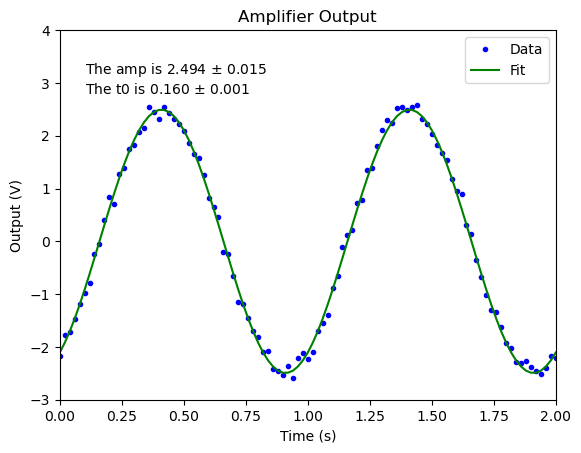

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
vModel(time, ampFit, t0Fit)
ax.plot(time, volts, '.b', label="Data")
ax.plot(time,vModel(time, ampFit, t0Fit),'-g', label="Fit")
ax.set_xlim(0,2)
ax.set_ylim(-3,4)
ax.legend()
ax.text(0.1,2.8,resultStr)
ax.set_title("Amplifier Output")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Output (V)")

# Using Two X-Axes
Some times you only have a few data points you are fitting, but you want to draw a smooth model curve with you data. In the cell below I've created an example with just a few data points and fit a model to the data. You should  plot the data and model. You will see the model is a set of straight line segments between data points that do not look very good.

In [40]:
time2 = np.linspace(0,2,7)
volts2 = 2.5 * np.sin(2 *np.pi * time2 - 1.0) + np.random.normal(0,0.1,len(time2))

** Now plot your data in the cell below. **

Text(0, 0.5, 'Output (V)')

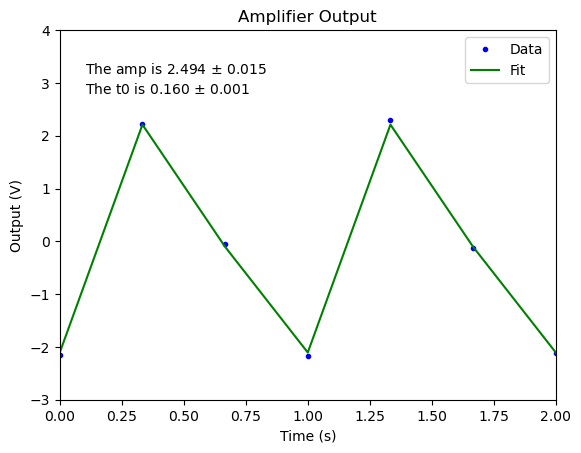

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(time2, volts2, '.b', label="Data")
ax.plot(time2, vModel(time2, ampFit, t0Fit),'-g', label="Fit")
ax.set_xlim(0,2)
ax.set_ylim(-3,4)
ax.legend()
ax.text(0.1,2.8,resultStr)
ax.set_title("Amplifier Output")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Output (V)")

That doesn't look very good, does it? 

The solution to making a better plot is to make an additional x-axis variable for plotting that has enough points to create a smooth model curve. Try making an array like this

```
tPlot = np.linspace(0.0, 2.0, 501)
```

then plot the fit function using this plotting axis.


Your plot should look similar this: 
![First Plot](Skill-06c.png)

Text(0, 0.5, 'Output (V)')

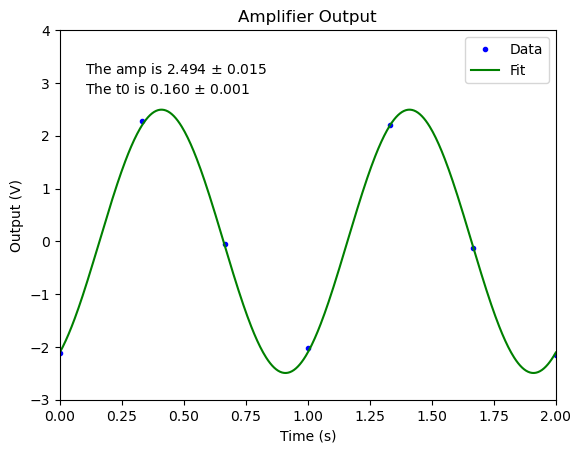

In [59]:
tPlot = np.linspace(0.0, 2.0, 501)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(time2, volts2, '.b', label="Data")
ax.plot(tPlot, vModel(tPlot, ampFit, t0Fit),'-g', label="Fit")
ax.set_xlim(0,2)
ax.set_ylim(-3,4)
ax.legend()
ax.text(0.1,2.8,resultStr)
ax.set_title("Amplifier Output")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Output (V)")

# Other Topics
There are many other data fitting topics I won't cover. You can Google them to find out. Here are some:
* **Error Bars** Sometimes you want to plot error bars on your data
* Correlated fit parameters

In [ ]:
from IPython.core.display import HTML
def css_styling():
    styles = open("custom.css", "r").read()
    return HTML(styles)
css_styling()